In [88]:
import sys
sys.path.append('../libs')
import neuronas
import importlib
importlib.reload(neuronas)
from neuronas import MLP    
from neuronas import Plotter  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np


In [89]:
housing = pd.read_csv('../data/Housing.csv')


In [90]:
housing_np = np.array(housing)

In [91]:
indices_cols = [5, 6, 7, 8, 9, 11]
for idx in indices_cols:
    housing_np[:, idx] = np.where(housing_np[:, idx] == 'yes', 1, 0)

In [92]:
features = housing_np[:, :-1]
target = housing_np[:, 1]  

In [93]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [94]:
y_train = y_train.reshape(-1, 1) 
y_test = y_test.reshape(-1, 1) 

In [95]:
scaler = MinMaxScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
y_train_normalized = scaler.fit_transform(y_train)
y_test_normalized = scaler.transform(y_test)


MLP con 8 Capas Ocultas

In [96]:
mlp_8_neurons = neuronas.MLP([12, 8, 1])

In [97]:
mlp_8_neurons.train(X_train_normalized, y_train_normalized, learning_rate=0.025, iterations=500)


In [98]:
predicciones_precios_casas = mlp_8_neurons.feedforward(X_test_normalized)


In [99]:
min_val = scaler.data_min_
max_val = scaler.data_max_

predicciones = predicciones_precios_casas * (max_val - min_val) + min_val

In [100]:
y_test = y_test.reshape(-1, 1)
predicciones = predicciones.reshape(-1, 1)

diferencias = y_test - predicciones

y_prima = np.hstack((predicciones, y_test, diferencias))


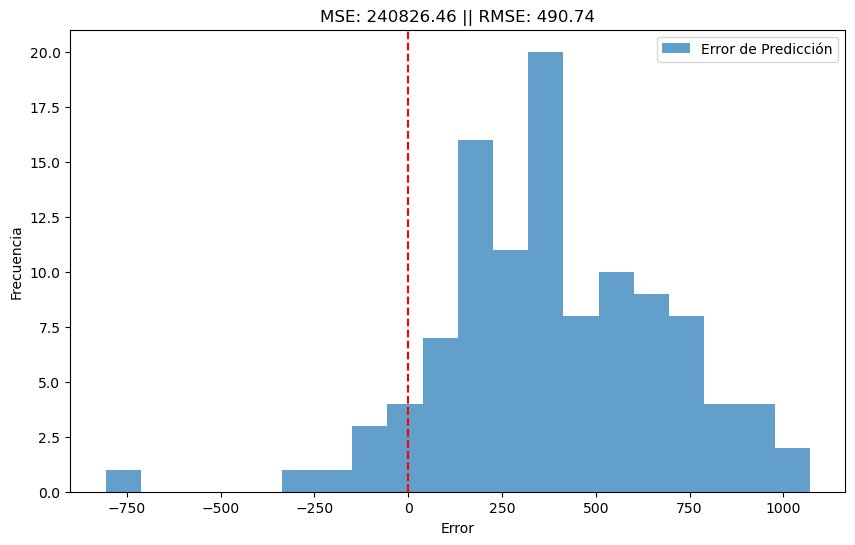

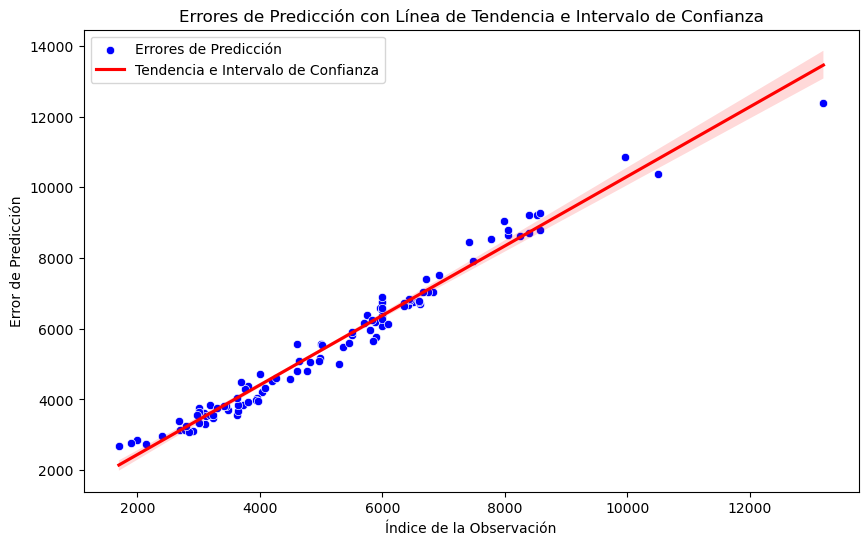

In [101]:
plotter = Plotter(y_test, predicciones)
plotter.plot_error_distribution()
plotter.plot_prediction_errors()

MLP con 12 Capas Ocultas

In [82]:
mlp_12_neurons = MLP([12, 12, 1])

In [83]:
mlp_12_neurons.train(X_train_normalized, y_train_normalized, learning_rate=0.025, iterations=500)


In [84]:
predicciones_precios_casas = mlp_12_neurons.feedforward(X_test_normalized)

In [85]:
min_val = scaler.data_min_
max_val = scaler.data_max_

predicciones = predicciones_precios_casas * (max_val - min_val) + min_val

In [86]:
y_test = y_test.reshape(-1, 1)
predicciones = predicciones.reshape(-1, 1)

diferencias = y_test - predicciones

y_prima2 = np.hstack((predicciones, y_test, diferencias))

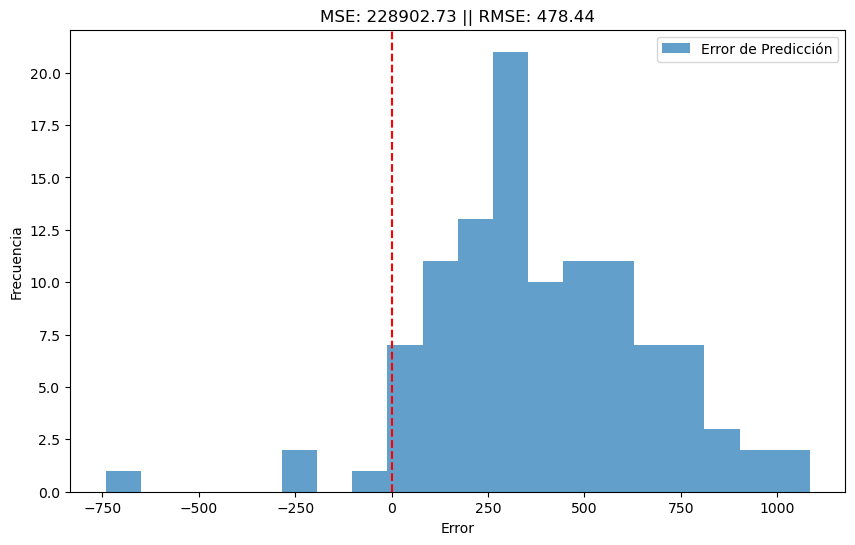

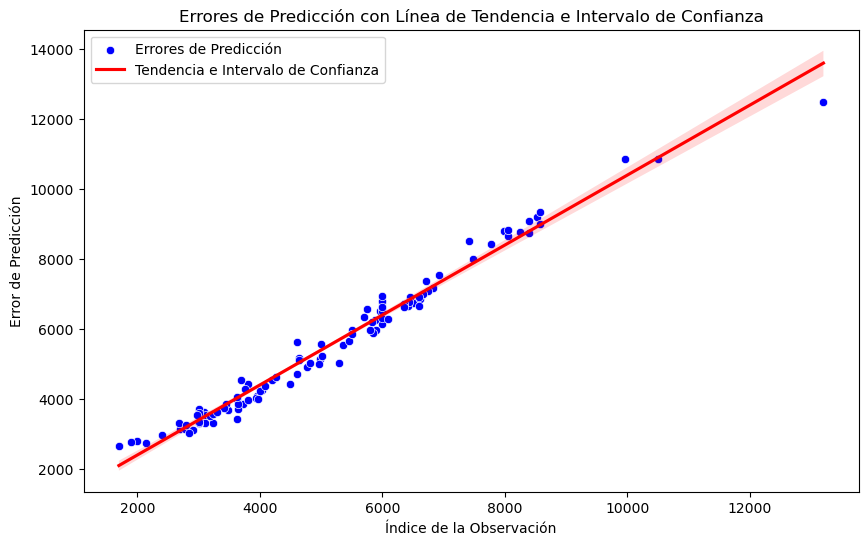

In [87]:
plotter = Plotter(y_test, predicciones)
plotter.plot_error_distribution()
plotter.plot_prediction_errors()